In [1]:
import xarray as xr

data = xr.open_dataset("tas_hist_final.nc")

data = data.sel(time=slice("2004-01-01", "2004-01-15"))

data.to_netcdf("animation.nc")


Saved tas_animation.gif (240 frames)
MP4 skipped (install imageio-ffmpeg to enable)


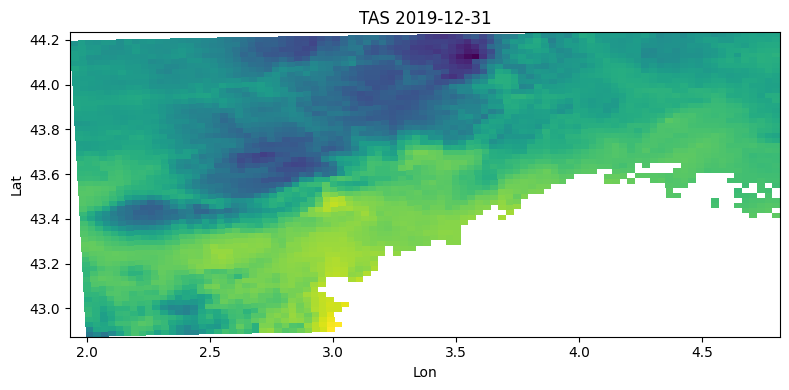

In [9]:
#!/usr/bin/env python
# animate_tas.py
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio
import os

nc_path = "tas_monthly.nc"
out_gif = "tas_animation.gif"
out_mp4 = "tas_animation.mp4"  # requires imageio-ffmpeg installed

# Pick an engine that’s available
for eng in ["h5netcdf", "netcdf4"]:
    try:
        ds = xr.open_dataset(nc_path, engine=eng)
        break
    except Exception:
        ds = None
if ds is None:
    raise RuntimeError("Install h5netcdf or netCDF4 so xarray can read the file.")

tas = ds["tasAdjust"]
time = tas["time"]
lat = tas["lat"]
lon = tas["lon"]

# Decode time if not automatic
try:
    tvals = np.array(time.dt.strftime("%Y-%m-%d"))
except Exception:
    tvals = np.arange(time.size)

frames = []
fig, ax = plt.subplots(figsize=(8, 4))
for i in range(tas.sizes["time"]):
    ax.clear()
    im = ax.pcolormesh(lon, lat, tas.isel(time=i))
    ax.set_title(f"TAS {tvals[i]}")
    ax.set_xlabel("Lon")
    ax.set_ylabel("Lat")
    #plt.colorbar(im, ax=ax, label="K")
    fig.tight_layout()

    tmp_png = f"frames/_frame_{i:04d}.png"
    fig.savefig(tmp_png, dpi=100)
    frames.append(imageio.imread(tmp_png))

imageio.mimsave(out_gif, frames, fps=6)
print(f"Saved {out_gif} ({len(frames)} frames)")

try:
    import imageio_ffmpeg  # noqa: F401
    imageio.mimsave(out_mp4, frames, fps=6, codec="libx264")
    print(f"Saved {out_mp4}")
except Exception:
    print("MP4 skipped (install imageio-ffmpeg to enable)")

for f in os.listdir():
    if f.startswith("_frame_") and f.endswith(".png"):
        os.remove(f)


## Carte de la moyenne mensuelle dans une année représentative

In [2]:
import xarray as xr
ds = xr.open_dataset("tas_final.nc")

In [3]:
print(ds.data_vars)

Data variables:
    time_bnds  (time, bnds) datetime64[ns] 117kB ...
    lon_bnds   (y, x, nv4) float64 174kB ...
    lat_bnds   (y, x, nv4) float64 174kB ...
    tasAdjust  (time, y, x) float32 159MB ...


In [4]:
ds

<xarray.Dataset> Size: 160MB
Dimensions:    (time: 7305, bnds: 2, y: 59, x: 92, nv4: 4)
Coordinates:
  * time       (time) datetime64[ns] 58kB 2000-01-01T12:00:00 ... 2019-12-31T...
  * y          (y) float64 472B 467.5 470.0 472.5 475.0 ... 607.5 610.0 612.5
  * x          (x) float64 736B 830.0 832.5 835.0 ... 1.055e+03 1.058e+03
    lon        (y, x) float64 43kB ...
    lat        (y, x) float64 43kB ...
    date       (time) <U10 292kB ...
Dimensions without coordinates: bnds, nv4
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 117kB ...
    lon_bnds   (y, x, nv4) float64 174kB ...
    lat_bnds   (y, x, nv4) float64 174kB ...
    tasAdjust  (time, y, x) float32 159MB ...
Attributes: (12/72)
    CDI:                           Climate Data Interface version 2.4.0 (http...
    Conventions:                   CF-1.11 ACDD-1.3
    source:                        CNRM-AROME46t1 model output corrected over...
    institution:                   Meteo-France
    title:                         CNRM-AROME46t1 model output corrected over...
    summary:                       Data were post-processed by the Météo-Fran...
    ...                            ...
    license:                       https://cordex.org/data-access/cordex-cmip...
    product_version:               v1
    comment:                       Preliminary data released in the Fall 2025...
    keywords:                      temperature, climate, France, near-surface...
    frequency:                     day
    CDO:                           Climate Data Operators version 2.4.0 (http...

In [8]:
tas_monthly = ds["tasAdjust"].resample(time="1M").mean()
tas_monthly.to_netcdf("tas_monthly.nc")


c:\Users\ggenelot\AppData\Local\miniconda3\envs\modele-SIG\Lib\site-packages\xarray\groupers.py:530: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


## Carte des évolution anuelles des précipitations 

In [4]:
ds_pr

<xarray.Dataset> Size: 160MB
Dimensions:    (time: 7306, bnds: 2, y: 59, x: 92, nv4: 4)
Coordinates:
  * time       (time) datetime64[ns] 58kB 2016-01-01T12:00:00 ... 2081-12-31T...
  * y          (y) float64 472B 467.5 470.0 472.5 475.0 ... 607.5 610.0 612.5
  * x          (x) float64 736B 830.0 832.5 835.0 ... 1.055e+03 1.058e+03
    lon        (y, x) float64 43kB ...
    lat        (y, x) float64 43kB ...
    date       (time) <U10 292kB ...
Dimensions without coordinates: bnds, nv4
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 117kB ...
    lon_bnds   (y, x, nv4) float64 174kB ...
    lat_bnds   (y, x, nv4) float64 174kB ...
    prAdjust   (time, y, x) float32 159MB ...
Attributes: (12/69)
    CDI:                           Climate Data Interface version 2.4.0 (http...
    Conventions:                   CF-1.11 ACDD-1.3
    source:                        CNRM-AROME46t1 model output corrected over...
    institution:                   Meteo-France
    title:                         CNRM-AROME46t1 model output corrected over...
    summary:                       Data were post-processed by the Météo-Fran...
    ...                            ...
    license:                       https://cordex.org/data-access/cordex-cmip...
    product_version:               v1
    comment:                       Preliminary data released in the Fall 2025...
    keywords:                      precipitation, climate, France, total prec...
    frequency:                     day
    CDO:                           Climate Data Operators version 2.4.0 (http...

In [3]:
ds_pr = xr.open_dataset("pr_final.nc")
ds_pr_sub = ds["prAdjust"].resample(time="1Y").sum()

KeyError: "No variable named 'prAdjust'. Did you mean one of ('tasAdjust',)?"